In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import os
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

import torch

from dataloader import MDITDataset
# from torch.utils.tensorboard import SummaryWriter
from model import MDIT

from metrics import *
device = torch.device("cpu")
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
print(device)

cpu


In [4]:
model = MDIT().to(device)

checkpoint = torch.load("checkpoint2.pth", map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])

print(checkpoint['epoch'])
model.eval()

57


MDIT(
  (fl): Sequential(
    (0): Conv2d(4, 4, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (encoding_units): ModuleList(
    (0): Sequential(
      (0): Conv2d(4, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): Sequential(
      (0): Conv2d(16, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): Sequential(
      (0): Conv2d(64, 256, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): Sequential(
      (0): Conv2d(256, 1024, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), bias

In [5]:
import matplotlib.pyplot as plt

def show_image(index, model):
    data = np.load('./processed_data/test/test_' + index + '.npy.npz')
    image_with_four_channels = data['B']
    label_channel = data['L']

    # Extract the RGB channels from the image
    rgb_channels = image_with_four_channels[:, :, 1:4]
    rgb_channels = np.flip(rgb_channels, axis=2)

    # Display the RGB channels
    plt.imshow(rgb_channels)
    plt.title('FCC images')
    plt.axis('off')
    plt.show()

    # Display the label channel
    # print (label_channel/255)
    # label_channel = label_channel/255
    # print(label_channel.max())
    # plt.imshow(label_channel, cmap='gray')
    # plt.title('Label Channel')
    # plt.axis('off')
    # plt.show()

    image = image_with_four_channels/255
    image = np.swapaxes(image, 0, 2)
    image = np.swapaxes(image, 1, 2)
    # print(image.shape)

    image = torch.from_numpy(image).float().to(device)
    with torch.no_grad():
        output = model(image.unsqueeze(0))
    # output = model(image)
    output = output.squeeze(0)
    # print(output)
    output = [[1 if pixel > 0.2 else 0 for pixel in row] for row in output]
    # output = torch.sigmoid(output)
    
    plt.imshow(output, cmap='gray')
    plt.title("Predicted")
    plt.axis('off')
    plt.show()


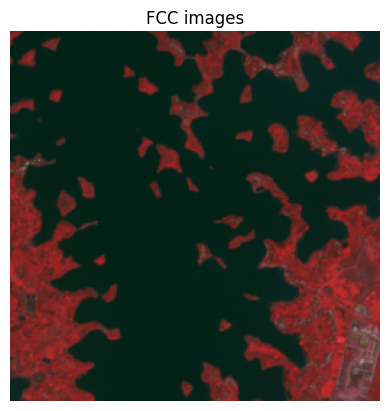

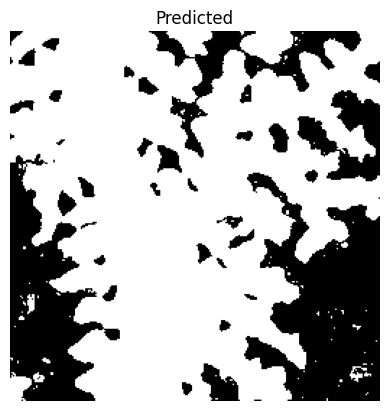

In [6]:
show_image('850', model)